# Basicos

* Imports

In [2]:
#***** Imports*******************
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 


* Creación de data

In [3]:
#(cuantos datos, cuantos centros/clusters, numero de features que definen los clusters
# ,desviación estándar de los clusters, random state para repetibilidad)
x,y = make_blobs(n_samples=100, centers =4, n_features=2, cluster_std=[1,1.5,2,2],
                 random_state = 7)
#print(x)
#print(y)

* Creación Dataframe

In [4]:
# 3 features, x' datos por cols, y
df_blobls = pd.DataFrame({
    'x1': x[:,0],
    'x2': x[:,1],
    'y':y
})

In [5]:
df_blobls.head(3)

,x1,x2,y
0,-3.384261,5.221740,1
1,-1.836238,-7.735384,3
2,-7.456176,6.198874,0


* Dibujar data

In [8]:
#2D, porque solo manejamos 2dimensiones de momento
#recibe el x, el y, y el axe donde ubicaré la gráfica
def plot_2d_clusters(x, y, ax):

  #Hago un series con las posibles categorias del cluster
  y_uniques= pd.Series(y).unique()

  #plot a x, sólo cuando pertenezca al y buscado
  #diagrama de scatter bidimensional basicamente
  for _ in y_uniques:
    x[y==_].plot(
        title = f'{len(y_uniques)} Clusters',
        kind = 'scatter',
        x = 'x1', #feeat
        y = 'x2', #feat 2
        marker = f'${_}$', #el marker toma el valor que itero
        ax = ax
    )

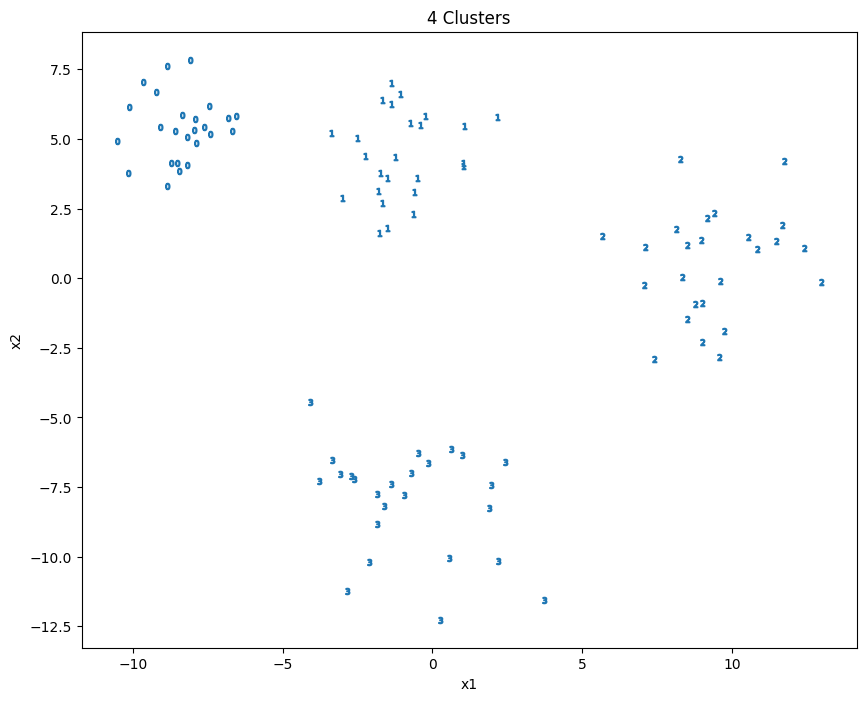

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10,8)) #creo  grafiac
x,y = df_blobls[['x1', 'x2']], df_blobls['y'] #saco a x y a y nuevamente

plot_2d_clusters(x,y, ax)

* Otra forma de graficar clusters

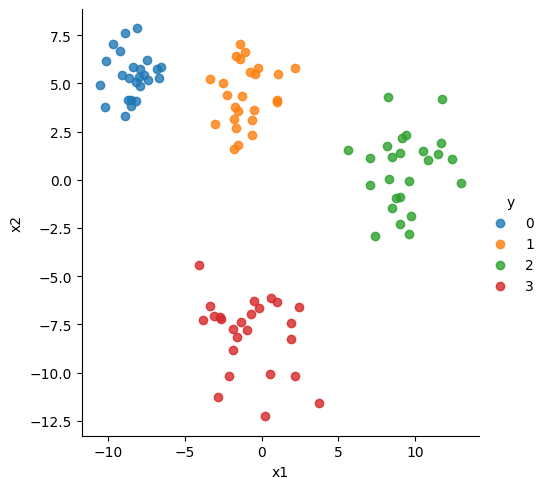

In [33]:
sns.lmplot(x='x1', y='x2', hue= 'y', data=df_blobls, fit_reg= False)

# Clustering

* Imports

In [14]:
from sklearn.cluster import KMeans

* Creo modelo

In [30]:
#n_clusters, es el número de clusters buscado
kmeans = KMeans(n_clusters = 2, random_state =7)

* Predicción, le paso la variable a clusterizar

In [31]:
y_pred = kmeans.fit_predict(x);
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int32)

* Comprobación gráfica predicho vs real

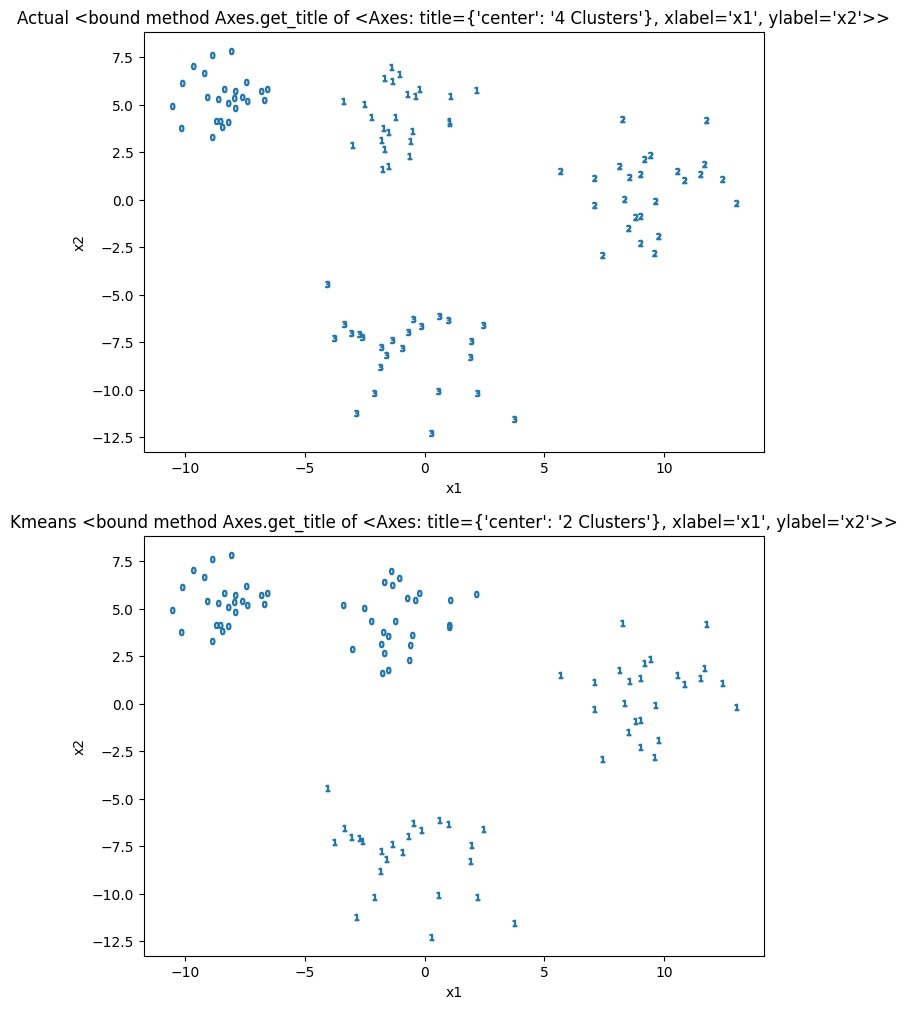

In [32]:
fig, axs = plt.subplots(2,1, figsize=(8,12)); #creo  grafica

plot_2d_clusters(x,y, axs[0]); #predicho
plot_2d_clusters(x,y_pred, axs[1]); #real

axs[0].set_title(f'Actual {axs[0].get_title}');
axs[1].set_title(f'Kmeans {axs[1].get_title}');